# Quantum Computing - Quantum Algorithms

### 0 - Setup

In [1]:
import qiskit as q

import warnings
warnings.filterwarnings("ignore")

### 1 - Crack passwords with the Bernstein-Vazirani Algorithm

In [2]:
pwd = "a" #"Abc123."

In [3]:
# encode text to binary
bin_pwd = " ".join(f"{ord(i):08b}" for i in pwd)
bin_pwd

'01100001'

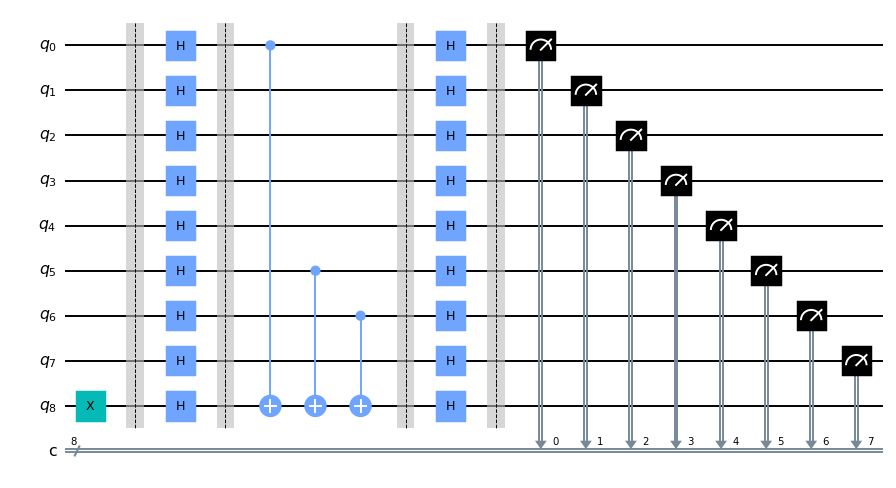

In [4]:
# model
n = len(bin_pwd)
c = q.QuantumCircuit(n+1, n)
c.x(n) #<-- X gate
c.barrier()

c.h(range(n+1)) #<-- Hadamard gate
c.barrier()

for i,y in enumerate(reversed(bin_pwd)):
    if y == '1': 
        c.cx(i, n) #<-- CNOT gate
c.barrier()

c.h(range(n+1)) #<-- Hadamard gate
c.barrier()

c.measure(range(n), range(n))

# plot
c.draw(output="mpl", scale=0.7)

In [5]:
# run
backend = q.Aer.get_backend('qasm_simulator')
res = q.execute(c, backend, shots=1).result()

bin_res = list(res.get_counts().keys())[0]
bin_res

'01100001'

In [6]:
# decode binary to text
res, i = "", 0
while True:
    res = res + bin_res[i:i+8] + " "
    i = i+9
    if i >= len(bin_res):
        break
res = res.strip()

res = "".join([chr(int(binary, 2)) for binary in res.split(" ")])
res

'a'